In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [35]:
df=pd.read_csv("e:/presentation2.csv")
x = df.iloc[:,0:24]
y=df.iloc[:,-1]
target=y

In [36]:
x=scale(x)
len(x)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


25

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [38]:
gnb = GaussianNB()
print(gnb.fit(x,y))

GaussianNB(priors=None, var_smoothing=1e-09)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.70)

In [40]:
y_pred=gnb.predict(x_test)
y_pred

array([2, 4, 3, 1, 4, 2, 1, 4, 4, 4, 3, 3, 4, 3, 1, 2, 1, 1], dtype=int64)

In [41]:

accuracy_score(y_pred,y_test) #accuracy

0.9444444444444444

In [42]:
from sklearn.metrics import accuracy_score
print("accuracy is:{0:.2f}%".format(accuracy_score(y_test,y_pred)*100))


accuracy is:94.44%


In [43]:
gnb.predict_proba(x_test)

array([[9.43898719e-07, 9.99999055e-01, 1.37681954e-09, 8.57913395e-52],
       [9.41724143e-88, 3.29154498e-30, 4.03459087e-31, 1.00000000e+00],
       [2.34812914e-08, 7.35844797e-06, 9.99992618e-01, 9.13543955e-14],
       [8.46347635e-01, 2.71879286e-02, 1.26464437e-01, 2.51543715e-29],
       [3.02209337e-74, 1.40634722e-26, 1.73763456e-25, 1.00000000e+00],
       [1.31441966e-11, 1.00000000e+00, 1.68323961e-13, 8.25836092e-60],
       [9.15618055e-01, 6.24481873e-02, 2.19337580e-02, 2.22564877e-32],
       [3.02209337e-74, 1.40634722e-26, 1.73763456e-25, 1.00000000e+00],
       [7.79640469e-51, 3.24394660e-19, 2.64101388e-15, 1.00000000e+00],
       [7.83630228e-93, 1.78083473e-31, 3.35076415e-33, 1.00000000e+00],
       [4.28349870e-04, 1.73393683e-04, 9.99398256e-01, 5.16908800e-20],
       [5.35654916e-05, 7.19511700e-05, 9.99874483e-01, 1.43356407e-18],
       [5.05152379e-80, 3.51759256e-28, 6.47322433e-28, 1.00000000e+00],
       [8.84164119e-04, 2.44089083e-04, 9.98871747e

In [44]:
y_pred

array([2, 4, 3, 1, 4, 2, 1, 4, 4, 4, 3, 3, 4, 3, 1, 2, 1, 1], dtype=int64)

In [45]:
y_test

23    2
0     4
9     3
18    1
13    4
24    2
21    1
7     4
11    4
14    4
22    3
15    3
3     4
5     3
20    1
19    2
1     1
16    2
Name: 3, dtype: int64

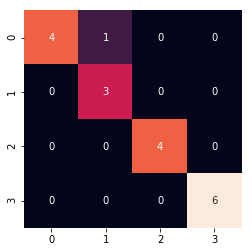

In [46]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

   micro avg       0.94      0.94      0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.96      0.94      0.94        18



In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gnb, x, y, cv=5)# cv=no of splits


print("Accuracy(using Cross validation): %.2f%%" % (scores.mean()*100.0)) 

Accuracy(using Cross validation): 92.14%


In [33]:
scores

array([0.42857143, 0.66666667, 0.75      , 0.5       , 0.75      ])